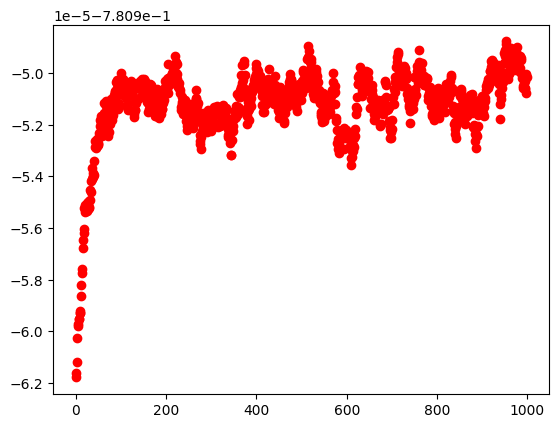

In [2]:
import matplotlib.pyplot as plt
import math
from random import random

RAND_MAX = 2 ** 16
RMI2 = 2.0 / RAND_MAX

STAGES = 3

A = [0.02109238, 0.07113478, 0.68873558]
P = [0.3190,  0.7756,  0.9613]

offset = sum(A)

class PinkNoise:
    def __init__(self) -> None:
        self.reset()

    def reset(self):
        self.state = [0.0] * STAGES

    def gen(self) -> float:
        tmp = 0.0
        for i in range(STAGES):
            tmp = random()
            self.state[i] = P[i] * (self.state[i] - tmp) + tmp
        
        return sum([A[i] * self.state[i] for i in range(STAGES)]) * RMI2 - offset

pn = PinkNoise()

for x in range(1000):
    plt.plot(x, pn.gen(), 'ro')